In [25]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np

# TASK 2: DATA UNDERSTANDING

In [2]:
train_df = pd.read_csv('training_set_VU_DM.csv')
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
# test_df = pd.read_csv('test_set_VU_DM.csv')
# test_df.columns

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [5]:

train_df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [6]:
# cols of interest 
pattern = r"^(srch|prop|visitor).*"
tmp = train_df[[x for x in train_df.columns if re.search(pattern, x)]]
tmp

,srch_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score
0,1,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,23246,1,0,4,0,1,1,NaN
1,1,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,23246,1,0,4,0,1,1,NaN
2,1,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,23246,1,0,4,0,1,1,NaN
3,1,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,23246,1,0,4,0,1,1,NaN
4,1,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,23246,1,0,4,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,219,NaN,NaN,219,77700,3,4.0,1,1.61,0.0471,0.00,16974,1,21,3,0,1,0,NaN
4958343,332785,219,NaN,NaN,219,88083,3,4.0,1,1.95,0.1520,0.00,16974,1,21,3,0,1,0,NaN
4958344,332785,219,NaN,NaN,219,94508,3,3.5,1,1.10,0.0164,0.00,16974,1,21,3,0,1,0,NaN
4958345,332785,219,NaN,NaN,219,128360,3,5.0,1,1.95,0.0662,0.00,16974,1,21,3,0,1,0,NaN


In [9]:
# plt.ticklabel_format(style='plain', axis='y')
# plt.title('Distribution of frequency of length of stay')
# sns.distplot(data=train_df['srch_length_of_stay'])
# train_df['srch_length_of_stay'].value_counts()

<Axes: title={'center': 'Distribution of frequency of destination country hotel bookings'}, xlabel='prop_country_id', ylabel='Count'>

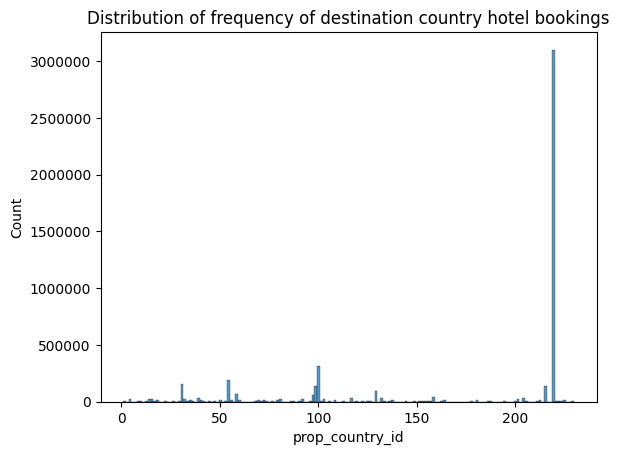

In [16]:
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of frequency of destination country hotel bookings')
sns.histplot(data=train_df['prop_country_id'])

- Analysing missing values

In [11]:
missing_df = pd.DataFrame(train_df.isnull().sum()/len(train_df))*100
missing_df.reset_index(inplace=True)
missing_df.rename(columns={0: 'percentage', 'index':'column'}, inplace=True)
missing_df = missing_df.sort_values(by = 'percentage', ascending = False)
missing_df

,column,percentage
29,comp1_rate_percent_diff,98.095353
44,comp6_rate_percent_diff,98.060362
27,comp1_rate,97.581250
28,comp1_inv,97.387053
38,comp4_rate_percent_diff,97.356256
52,gross_bookings_usd,97.208949
47,comp7_rate_percent_diff,97.206428
42,comp6_rate,95.156511
4,visitor_hist_starrating,94.920364
5,visitor_hist_adr_usd,94.897735


In [12]:
# dropping columns with >0 % missing values for now 

cols_to_drop = missing_df[missing_df['percentage'] > 0]['column'].unique() 
# cols_to_drop = missing_df['column'].unique()
train_df = train_df.drop(cols_to_drop, axis=1)
train_df.columns


Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_brand_bool',
       'prop_location_score1', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'random_bool', 'click_bool', 'booking_bool'],
      dtype='object')

In [13]:
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,1,2.83,4.95,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,1,2.20,5.03,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,1,2.20,4.92,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,1,2.83,4.39,...,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,1,2.64,4.93,...,23246,1,0,4,0,1,1,1,0,0


- Data types of columns after dropping 

- stats on unique counts of attributes

In [19]:
for col, count in train_df.nunique().to_dict().items():
    print(f'{col} : {count}')

srch_id = 199795
date_time = 198615
site_id = 34
visitor_location_country_id = 210
prop_country_id = 172
prop_id = 129113
prop_starrating = 6
prop_brand_bool = 2
prop_location_score1 = 337
prop_log_historical_price = 392
position = 40
price_usd = 76465
promotion_flag = 2
srch_destination_id = 18127
srch_length_of_stay = 36
srch_booking_window = 429
srch_adults_count = 9
srch_children_count = 10
srch_room_count = 8
srch_saturday_night_bool = 2
random_bool = 2
click_bool = 2
booking_bool = 2
relevance = 3


In [22]:
train_df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_brand_bool                  int64
prop_location_score1           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
random_bool                      int64
click_bool                       int64
booking_bool                     int64
relevance                        int64
dtype: object

# TASK 3: DATA PREPARATION 

- Encoding the categorical columns as category 

In [23]:
categorical_cols = ['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'srch_destination_id']
train_df[categorical_cols] = train_df[categorical_cols].astype('category')


- Frequency encoding categorical columns to be used in XGboost

In [24]:
train_df_2 = train_df.copy()

In [27]:

for col in categorical_cols:
    freq = train_df_2[col].value_counts()
    train_df_2[col+ '_freq_encoded'] = train_df_2[col].map(freq)
    train_df_2[col+ '_freq_encoded'] = train_df_2[col+ '_freq_encoded'].apply(np.log)


TypeError: Object with dtype category cannot perform the numpy op log

In [ ]:
train_df_2

Hotels for each user query are assigned relevance grades as follows:
- 5 - The user purchased a room at this hotel
- 1 - The user clicked through to see more information on this hotel
- 0 - The user neither clicked on this hotel nor purchased a room at this hotel

Submissions for each user query should recommend hotels in order from the highest grade
(most likely to purchase a hotel room) to the lowest grade (least likely to purchase a hotel
room or click on the hotel).

#### Creating relevance score column

In [14]:
def _relevance(x):

    if x['booking_bool'] == 1:
        return 5
    elif x['click_bool'] == 1:
        return 1
    else:
        return 0



train_df['relevance'] = train_df.apply(_relevance, axis=1)

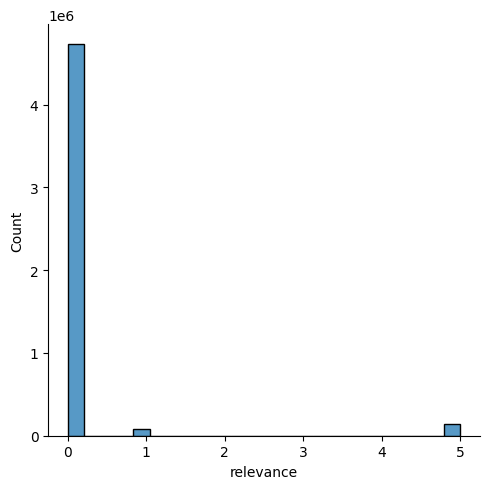

In [15]:
sns.displot(data=train_df['relevance'])